In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
from google.colab import files
df=files.upload()


Saving Titanic_train.csv to Titanic_train.csv


In [3]:
train_data=pd.read_csv('Titanic_train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
train_datacopy=train_data.copy()
train_datacopy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_datacopy=pd.get_dummies(train_datacopy,columns=['Sex','Embarked'],dtype=int)
train_datacopy

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0


In [8]:
train_datacopy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train_datacopy.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True,axis = 1)
train_datacopy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [10]:
train_datacopy= train_datacopy.dropna()
train_datacopy.shape

(714, 11)

In [11]:
train_datacopy.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0


In [12]:
X_train=train_datacopy.iloc[:,1:]
Y_train= train_datacopy.iloc[:,0]

In [13]:
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
classifier.coef_

array([[-1.11106716e+00, -4.05156270e-02, -3.50038977e-01,
        -4.10812215e-02,  1.97664532e-03,  2.16274582e+00,
        -4.01502705e-01,  9.43620887e-01,  1.91064686e-01,
         4.63627223e-01]])

In [15]:
classifier.intercept_

array([2.24539053])

In [16]:
predict = classifier.predict(X_train)
predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [17]:
classifier.classes_

array([0, 1])

In [18]:
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(X_train)
pred_prob

array([[0.90488649, 0.09511351],
       [0.0764238 , 0.9235762 ],
       [0.37734782, 0.62265218],
       ...,
       [0.04520889, 0.95479111],
       [0.33574044, 0.66425956],
       [0.92952594, 0.07047406]])

In [19]:
pred_prob=pd.DataFrame(pred_prob)

pred_prob
pred_prob['manual_prediction']=pred_prob[1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob

,0,1,manual_prediction
0,0.904886,0.095114,0
1,0.076424,0.923576,1
2,0.377348,0.622652,1
3,0.109333,0.890667,1
4,0.918924,0.081076,0
...,...,...,...
709,0.613476,0.386524,0
710,0.727672,0.272328,0
711,0.045209,0.954791,1
712,0.335740,0.664260,1


In [20]:
pred_prob['Predictions_Model'] = classifier.predict(X_train)
pred_prob

,0,1,manual_prediction,Predictions_Model
0,0.904886,0.095114,0,0
1,0.076424,0.923576,1,1
2,0.377348,0.622652,1,1
3,0.109333,0.890667,1,1
4,0.918924,0.081076,0,0
...,...,...,...,...
709,0.613476,0.386524,0,0
710,0.727672,0.272328,0,0
711,0.045209,0.954791,1,1
712,0.335740,0.664260,1,1


In [21]:
y_pred_df= pd.DataFrame({'actual': Y_train,
                         'predictions': classifier.predict(X_train)})
y_pred_df

,actual,predictions
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
886,0,0
887,1,1
889,1,1


In [22]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==0)])
print('True Positives', TP)
print('True Negatives', TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives 208
True Negatives 364
False Positives 60
False Negatives 82


In [23]:
len(y_pred_df)

714

In [24]:
result=[]
for i in range (len(pred_prob)):
  if pred_prob.loc[i,'manual_prediction']==1 & pred_prob.loc[i,'Predictions_Model']==1:

    result.append('True Positive')
  elif pred_prob.loc[i,'manual_prediction']==0 & pred_prob.loc[i,'Predictions_Model']==0:

    result.append('True Negative')
  elif pred_prob.loc[i,'manual_prediction']==1 & pred_prob.loc[i,'Predictions_Model']==0:

    result.append('False Negative')
  elif pred_prob.loc[i,'manual_prediction']==0 & pred_prob.loc[i,'Predictions_Model']==1:

    result.append('False Positive')
  else:
    print('Invalid')
    result.append('Invalid')
pred_prob['Result']=pd.Series(result)
pred_prob


,0,1,manual_prediction,Predictions_Model,Result
0,0.904886,0.095114,0,0,True Negative
1,0.076424,0.923576,1,1,True Positive
2,0.377348,0.622652,1,1,True Positive
3,0.109333,0.890667,1,1,True Positive
4,0.918924,0.081076,0,0,True Negative
...,...,...,...,...,...
709,0.613476,0.386524,0,0,True Negative
710,0.727672,0.272328,0,0,True Negative
711,0.045209,0.954791,1,1,True Positive
712,0.335740,0.664260,1,1,True Positive


0.7878659726740405


Text(0, 0.5, 'True Positive Rate / Sensitivity')

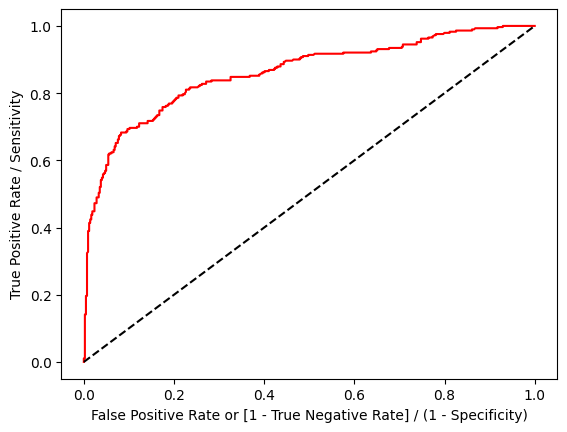

In [25]:
#AUC = Area Under Curve
#The greater the area under the curve, the better the model.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_train, classifier.predict_proba(X_train)[:,1])

auc = roc_auc_score(Y_train, predict)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

In [26]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [27]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
train_datacopy.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546,0.634454,0.182073,0.039216,0.775910
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.481921,0.386175,0.194244,0.417274
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
model = LogisticRegression()
model.fit(X_train, Y_train)

import streamlit as st
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


pickle.dump(model, open("spam_classifier.pkl", "wb"))

st.title("Logistic Regression Prediction App")
st.write("Enter data for prediction:")


Pclass = st.number_input("Pclass:", min_value=1, max_value=3)
Age = st.number_input("Age:", min_value=int(0.42), max_value=80)
SibSp = st.number_input("SibSp:", min_value=0, max_value=5)
Parch = st.number_input("Parch:", min_value=0, max_value=6)
Fare= st.number_input("Fare :", min_value=0, max_value=int(512.329200))
Sex_female= st.number_input("Sex_female:", min_value=0, max_value=1)
Sex_male = st.number_input("Sex_male:", min_value=0, max_value=1)
Embarked_C= st.number_input("Embarked_C:", min_value=0, max_value=1)
Embarked_Q = st.number_input("Embarked_Q:", min_value=0, max_value=1)
Embarked_S = st.number_input("Embarked_S:", min_value=0, max_value=1)


data = [[Pclass, Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S]]


prediction = model.predict(data)[0]
probability = model.predict_proba(data)[0][prediction] * 100

if prediction == 1:
    predicted_class = "Class 1"
else:
    predicted_class = "Class 2"

st.write(f"Predicted Class: {predicted_class}")
st.write(f"Probability: {probability:.2f}%")

if __name__ == '__main__':

    pass

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024-08-21 12:04:51.348 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-21 12:04:51.352 Session state does not function when running a script without `streamlit run`


**Interview Questions**

1)

	•	Precision focuses on the accuracy of the positive predictions, minimizing false positives.
	•	Recall focuses on capturing all positive cases, minimizing false negatives.

There’s often a trade-off between precision and recall, which is why they are often considered together using the F1 score.

2) Cross-validation is a technique where a dataset is split into multiple subsets, and the model is trained and tested on different combinations of these subsets to evaluate its performance. It's important in binary classification because it helps ensure that the model generalizes well to unseen data, reduces overfitting, and provides a more reliable estimate of its accuracy across different portions of the dataset.